In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Punto A

In [3]:
def puntoa(a,x,y):
    return a[0]+a[1]*x+a[2]*y+a[3]*x*y


# Punto B

In [4]:
position=np.zeros((4,2))
position[0][0]=1
position[0][1]=1
position[1][0]=-1
position[1][1]=1
position[2][0]=-1
position[2][1]=-1
position[3][0]=1
position[3][1]=-1
position

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

# Punto C

In [5]:
M=np.ones((4,4))
for i in range(4):
    M[i,1:4]=[position[i,0],position[i,1],position[i,1]*position[i,0]]
M

array([[ 1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.],
       [ 1., -1., -1.,  1.],
       [ 1.,  1., -1., -1.]])

In [6]:
T=np.array([1,2,0.5,0.3])
p_vector=np.linalg.solve(M,T)

In [7]:
p_vector

array([ 0.95, -0.3 ,  0.55, -0.2 ])

# Punto D

In [8]:
print(puntoa(p_vector,1,1))
print(puntoa(p_vector,-1,1))
print(puntoa(p_vector,-1,-1))
print(puntoa(p_vector,1,-1))

1.0
2.0
0.49999999999999994
0.2999999999999999


# Punto E

50

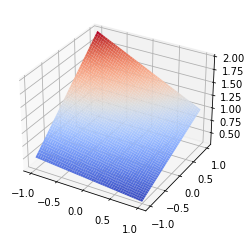

In [14]:
X = np.linspace(-1,1,50)
Y = np.linspace(-1,1,50)
X,Y = np.meshgrid(X,Y)
Temps = puntoa(p_vector,X,Y)
fig,ax = plt.subplots(subplot_kw={"projection":"3d"})
surf = ax.plot_surface(X,Y,Temps,cmap=cm.coolwarm)
len(Temps)

# Punto F

In [71]:
puntoa(p_vector,0,0.5)

1.225

La Temperatura en p es aproximadamente 1.225

# Punto G

In [72]:
def minimizacion(position,ang):
    M=np.array([[np.cos(ang),-np.sin(ang)],
    [np.sin(ang),np.cos(ang)]])
    
    res=np.dot(M,position.T)
    return res
  
position2=minimizacion(position,np.pi/2).T

# Punto H

In [73]:
N=np.ones((4,4))
for i in range(4):
    N[i,1:4]=[position2[i,0],position2[i,1],position2[i,1]*position2[i,0]]

In [74]:
N

array([[ 1., -1.,  1., -1.],
       [ 1., -1., -1.,  1.],
       [ 1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.]])

In [75]:
p_vector2=np.linalg.solve(N,T)

In [76]:
p_vector2

array([ 0.95, -0.55, -0.3 ,  0.2 ])

In [77]:
puntoa(p_vector2,0,0.5)

0.8

# Punto I

In [78]:
theta=np.linspace(0,2*np.pi,200)


In [79]:
temp=[]
for i in range(200):
    position2=minimizacion(position,theta[i]).T
    N=np.ones((4,4))
    for j in range(4):
        N[j,1:4]=[position2[j,0],position2[j,1],position2[j,1]*position2[j,0]]
    p_vector2=np.linalg.solve(N,T)
    temp.append(puntoa(p_vector2,0,0.5))
    


In [80]:
theta[temp.index(min(temp))]*180/np.pi

151.95979899497488

El ángulo donde la temperatura es mínima es 151.96 grados